In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
%matplotlib inline

In [2]:
def Gaussian(data):
    mu, std = norm.fit(data)
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin,xmax, 100)
    p = norm.pdf(x, mu, std)
    return p

In [3]:
def Distr_D_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = (1/(3.2))*(x[i]**(-1+(1/2)))*((1-x[i])**(-1/2))
    
    return p

def Distr_DIII_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = (1/(2.1))*(x[i]**(-1+(2/2)))*((1-x[i])**(-1/2))
    
    return p

def Distr_C_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = 3*2*x[i]*(1-x[i]) 
    return p

def Distr_CI_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = (1.5)*np.sqrt(1-x[i])
    return p

In [4]:
df_Andreev_G_D = pd.read_csv(r'Channel/Andreev_G_D_Channel.txt', sep = '\t', header = None)
df_Andreev_P_D = pd.read_csv(r'Channel/Andreev_P_D_Channel.txt', sep = '\t', header = None)

df_Andreev_G_DIII = (1/2)*pd.read_csv(r'Channel/Andreev_G_DIII_Channel.txt', sep = '\t', header = None)
df_Andreev_P_DIII = (1/2)*pd.read_csv(r'Channel/Andreev_P_DIII_Channel.txt', sep = '\t', header = None)

df_Andreev_G_C = (1/2)*pd.read_csv(r'Channel/Andreev_G_C_Channel.txt', sep = '\t', header = None)
df_Andreev_P_C = (1/2)*pd.read_csv(r'Channel/Andreev_P_C_Channel.txt', sep = '\t', header = None)

df_Andreev_G_CI = (1/2)*pd.read_csv(r'Channel/Andreev_G_CI_Channel.txt', sep = '\t', header = None)
df_Andreev_P_CI = (1/2)*pd.read_csv(r'Channel/Andreev_P_CI_Channel.txt', sep = '\t', header = None)

In [5]:
df_Andreev_G_D.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.008517,0.698869,1.341700,1.63056,1.89972,2.26091,3.54210,3.35657,4.63976,4.66801
2,0.000305,1.124990,1.738530,1.89404,2.59788,2.72139,2.97244,4.00270,4.36729,5.19064
3,0.009404,0.431998,1.534480,1.91233,2.37681,2.26579,3.52339,4.32145,4.00683,4.77974
4,0.944498,1.171370,1.569980,1.63735,2.00889,2.92650,3.00256,3.60877,4.37982,4.69125
5,0.935870,0.676819,0.773126,2.03213,2.40801,2.82952,3.35561,4.29063,4.27503,5.09310
...,...,...,...,...,...,...,...,...,...,...
99996,0.425236,0.829951,1.422500,1.75226,2.60352,2.82804,3.34460,4.00541,4.26532,5.03075
99997,0.982006,0.558259,1.246360,1.84510,2.53588,3.01199,3.55465,3.84628,4.43025,4.95400
99998,0.922878,1.164090,1.567600,2.27556,1.73936,3.14962,4.17187,3.95116,4.35176,4.69868
99999,0.005875,0.973783,1.403520,1.82688,2.80571,3.13784,4.42628,3.98610,4.55320,4.76900


In [6]:
df_Andreev_G_DIII.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.345612,1.117895,1.817055,2.134470,2.749995,3.447595,3.875560,4.428360,4.449040,5.34725
2,0.152713,1.365710,1.416660,2.487215,2.449710,3.108120,3.637095,4.225035,5.168150,5.61200
3,0.080961,1.425595,1.700755,1.764200,2.644730,3.097300,3.855375,4.420225,3.974140,5.34390
4,0.434142,0.987545,1.602125,2.161795,2.515760,2.809630,4.015125,4.355435,4.151295,5.23590
5,0.807145,0.998670,1.763545,2.310450,2.349465,3.173250,4.001935,4.251160,4.467375,5.21025
...,...,...,...,...,...,...,...,...,...,...
99996,0.218003,1.141940,1.820960,1.956205,2.311430,3.182525,3.879530,3.768840,4.360980,5.24200
99997,0.114609,1.092550,1.571120,2.511810,2.300225,2.961320,3.435190,4.063150,4.674830,5.02800
99998,0.486482,1.098470,1.596800,2.346705,2.084660,3.656840,3.670975,4.311280,4.737505,5.23835
99999,0.911685,1.522515,1.789670,2.515565,2.689345,3.014720,3.821305,3.929540,4.610680,5.07885


In [7]:
df_Andreev_G_C.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.291884,0.884680,1.337200,1.904185,2.476455,2.750250,3.725640,4.347450,4.445475,4.935550
2,0.724275,1.277675,1.854610,2.318990,2.478805,3.054440,3.404550,4.369145,4.363015,5.156850
3,0.561730,1.145725,1.524100,1.623755,2.591305,2.650000,3.535305,3.983725,4.513620,4.952880
4,0.544385,1.079770,1.371515,1.513285,2.355340,3.315595,3.341820,4.218290,4.402065,5.268450
5,0.076395,0.934815,1.548955,2.136555,2.541570,2.783665,3.707645,4.120655,4.310445,4.826695
...,...,...,...,...,...,...,...,...,...,...
99996,0.825835,1.205720,1.397235,2.262965,2.159280,3.386330,3.337730,3.715780,4.292465,5.121450
99997,0.836265,1.151570,1.211700,1.958385,2.571245,3.059180,3.512440,3.973170,4.739410,4.929950
99998,0.614635,0.693830,1.387735,1.959985,2.693320,2.753160,3.444945,4.026980,4.664060,4.898550
99999,0.677090,0.635810,1.592920,2.109370,2.719375,3.086550,3.371600,4.058135,4.385620,4.923890


In [8]:
df_Andreev_G_CI.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.156729,0.773660,1.150330,1.977450,2.348475,2.895770,3.441570,3.903535,4.248515,4.789005
2,0.558215,0.938750,1.167595,1.552525,2.440565,2.738845,3.673420,4.190205,4.068030,4.982695
3,0.785710,1.098305,1.381125,1.931945,2.053640,2.858320,2.920840,3.589670,4.315255,4.734510
4,0.825050,0.975400,1.291455,1.904805,2.659365,3.093990,3.027255,4.085835,4.506225,4.715565
5,0.813240,0.946450,1.693250,1.821780,2.794850,2.956795,3.694180,3.705640,4.146025,4.548120
...,...,...,...,...,...,...,...,...,...,...
99996,0.246232,1.128095,1.386290,1.804405,2.132930,2.404190,3.477890,3.646120,4.814145,4.925745
99997,0.521095,1.134360,1.747750,2.003930,2.402560,2.694595,2.869110,3.729760,4.190100,5.069150
99998,0.472424,0.302179,1.054000,2.235195,2.477185,2.919675,3.015485,3.896230,4.182580,4.879920
99999,0.006421,0.816340,1.432125,1.707450,2.575235,2.689240,3.117025,3.477740,4.802655,4.345305


In [9]:
G_D = df_Andreev_G_D.values
P_D = df_Andreev_P_D.values

G_DIII = df_Andreev_G_DIII.values
P_DIII = df_Andreev_P_DIII.values

G_C = df_Andreev_G_C.values
P_C = df_Andreev_P_C.values

G_CI = df_Andreev_G_CI.values
P_CI = df_Andreev_P_CI.values

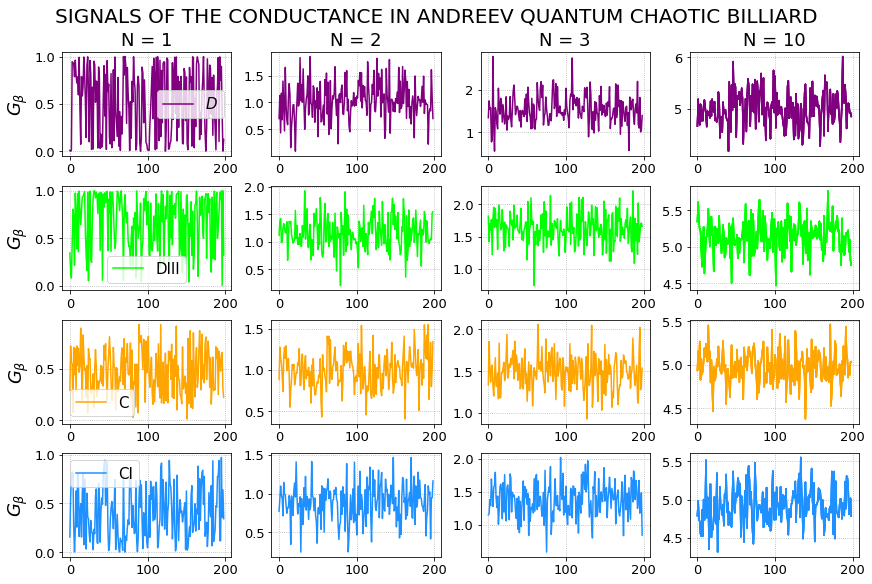

In [10]:
fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'SIGNALS OF THE CONDUCTANCE IN ANDREEV QUANTUM CHAOTIC BILLIARD', fontsize = 20)

for j in range(0,4):
    for i in range(0,4):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].plot(G_D[0:199,9], color='purple', label = r'D', alpha=1);
            axs[1,3].plot(G_DIII[0:199,9], color='lime', label = r'DIII', alpha=1);
            axs[2,3].plot(G_C[0:199,9], color='orange', label = r'C', alpha=1);
            axs[3,3].plot(G_CI[0:199,9], color='dodgerblue', label = r'CI', alpha=1);
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].plot(G_D[0:199,j], color='purple', label = r'$D$', alpha=1);
            else:
                if (i == 1):
                    axs[i,j].plot(G_DIII[0:199,j], color='lime', label = r'DIII', alpha=1);
                else:
                    if (i == 2):
                        axs[i,j].plot(G_C[0:199,j], color='orange', label = r'C', alpha=1);
                    else:
                        if (i == 3):
                            axs[i,j].plot(G_CI[0:199,j], color='dodgerblue', label = r'CI', alpha=1);
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$G_{\beta}$', fontsize = 18)
            axs[i,0].legend(fontsize = 15)
            
        axs[i,j].grid(linestyle=':')

/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


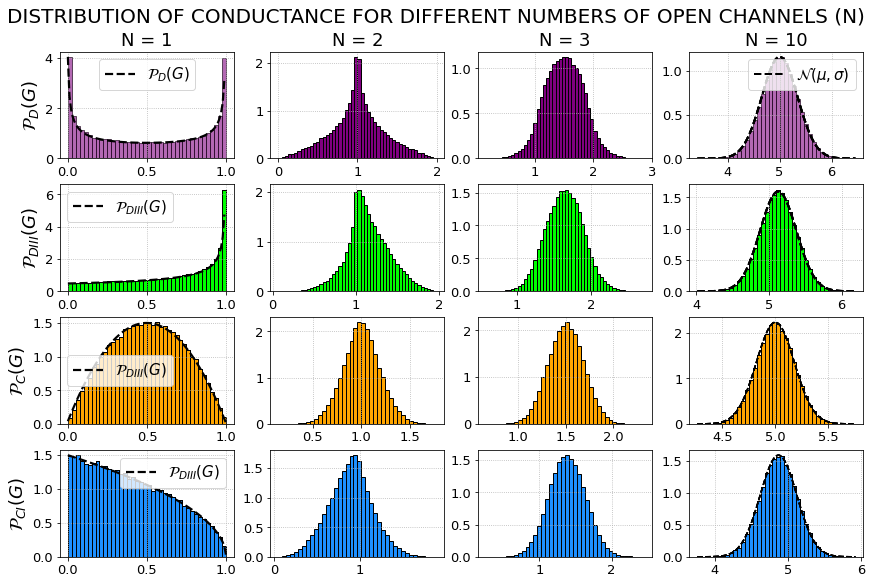

In [11]:
steps = 50

fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,4):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 0):
            
            axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(G)$', fontsize = 18)
            axs[1,0].set_ylabel(r'$\mathcal{P}_{DIII}(G)$', fontsize = 18)
            axs[2,0].set_ylabel(r'$\mathcal{P}_{C}(G)$', fontsize = 18)
            axs[3,0].set_ylabel(r'$\mathcal{P}_{CI}(G)$', fontsize = 18)
            
            axs[0,0].set_title('N = 1', fontsize = 18) 
            
            axs[0,0].hist(G_D[:,0], bins = 40, color='purple', alpha=0.2, density = True, histtype='bar', ec='black');
            axs[1,0].hist(G_DIII[:,0], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,0].hist(G_C[:,0], bins = 40, color='orange', alpha=1, density = True, histtype='bar', ec='black');
            axs[3,0].hist(G_CI[:,0], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');

            if (i == 0):
                x = np.linspace(np.min(G_D[:,0]), np.max(G_D[:,0]), 100)
                axs[0,0].plot(x, Distr_D_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[0,0].legend(fontsize = 15, loc = "best")
            
            elif (i == 1):
                x = np.linspace(np.min(G_DIII[:,0]), np.max(G_DIII[:,0]), 100)
                axs[1,0].plot(x, Distr_DIII_N1(G_DIII[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[1,0].legend(fontsize = 15, loc = "best")
                
            elif (i == 2):
                x = np.linspace(np.min(G_C[:,0]), np.max(G_C[:,0]), 100)
                axs[2,0].plot(x, Distr_C_N1(G_C[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[2,0].legend(fontsize = 15, loc = "best")
                
            elif (i == 3):
                x = np.linspace(np.min(G_CI[:,0]), np.max(G_CI[:,0]), 100)
                axs[3,0].plot(x, Distr_CI_N1(G_CI[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[3,0].legend(fontsize = 15, loc = "best")
            
        elif (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(G_D[:,9], bins = 40, color='purple', alpha=0.2, density = True, histtype='bar', ec='black');
            axs[1,3].hist(G_DIII[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(G_C[:,9], bins = 40, color='orange', alpha=1, density = True, histtype='bar', ec='black');
            axs[3,3].hist(G_CI[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');

            x = np.linspace(np.min(G_D[:,9]), np.max(G_D[:,9]), 100)
            axs[0,3].plot(x,Gaussian(G_D[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 2, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_DIII[:,9]), np.max(G_DIII[:,9]), 100)
            axs[1,3].plot(x,Gaussian(G_DIII[:,9]), color = 'black', alpha = 1, linewidth = 2, linestyle = 'dashed')

            x = np.linspace(np.min(G_C[:,9]), np.max(G_C[:,9]), 100)
            axs[2,3].plot(x,Gaussian(G_C[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_CI[:,9]), np.max(G_CI[:,9]), 100)
            axs[3,3].plot(x,Gaussian(G_CI[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(G_D[:,j], bins = 50, color='purple', label = r'D', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(G_DIII[:,j], bins = 50, color='lime', label = r'DIII', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(G_C[:,j], bins = 40, color='orange', label = r'C', alpha=1, density = True, histtype='bar', ec='black');
                    else:
                        if (i == 3):
                            axs[i,j].hist(G_CI[:,j], bins = 40, color='dodgerblue', label = r'CI', alpha=1, density = True, histtype='bar', ec='black');
            
        
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15, loc = 'best')
        
        axs[i,j].grid(linestyle=':')

/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


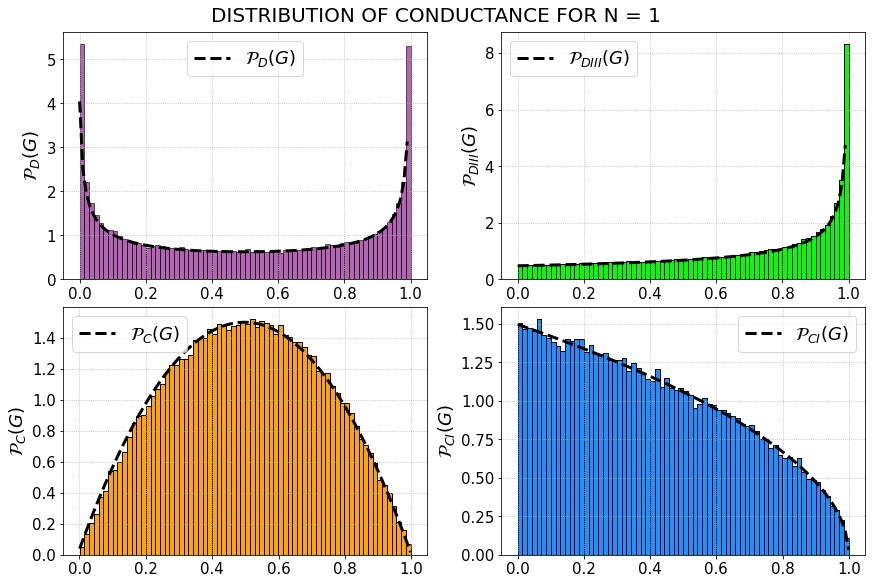

In [12]:
steps = 50

fig, axs = plt.subplots(2,2, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR N = 1', fontsize = 20)

         
axs[0,0].hist(G_D[:,0], bins = 70, color='purple', alpha=0.6, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_D[:,0]), np.max(G_D[:,0]), 100)
axs[0,0].plot(x, Distr_D_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(G)$', fontsize = 18)
axs[0,0].legend(fontsize = 18, loc = 'best')

axs[0,1].hist(G_DIII[:,0], bins = 70, color='lime', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_DIII[:,0]), np.max(G_DIII[:,0]), 100)
axs[0,1].plot(x, Distr_DIII_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[0,1].set_ylabel(r'$\mathcal{P}_{DIII}(G)$', fontsize = 18)
axs[0,1].legend(fontsize = 18, loc = 'best')

axs[1,0].hist(G_C[:,0], bins = 70, color='orange', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_C[:,0]), np.max(G_C[:,0]), 100)
axs[1,0].set_ylabel(r'$\mathcal{P}_{C}(G)$', fontsize = 18)
axs[1,0].plot(x, Distr_C_N1(G_C[:,0]), color = 'black', label = r'$\mathcal{P}_{C}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[1,0].legend(fontsize = 18, loc = 'best')

axs[1,1].hist(G_CI[:,0], bins = 70, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_CI[:,0]), np.max(G_CI[:,0]), 100)
axs[1,1].set_ylabel(r'$\mathcal{P}_{CI}(G)$', fontsize = 18)
axs[1,1].plot(x, Distr_CI_N1(G_CI[:,0]), color = 'black', label = r'$\mathcal{P}_{CI}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[1,1].legend(fontsize = 18, loc = 'best')

for i in range(2):
    for j in range(2):
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 15)
        axs[i,j].grid(linestyle=':')

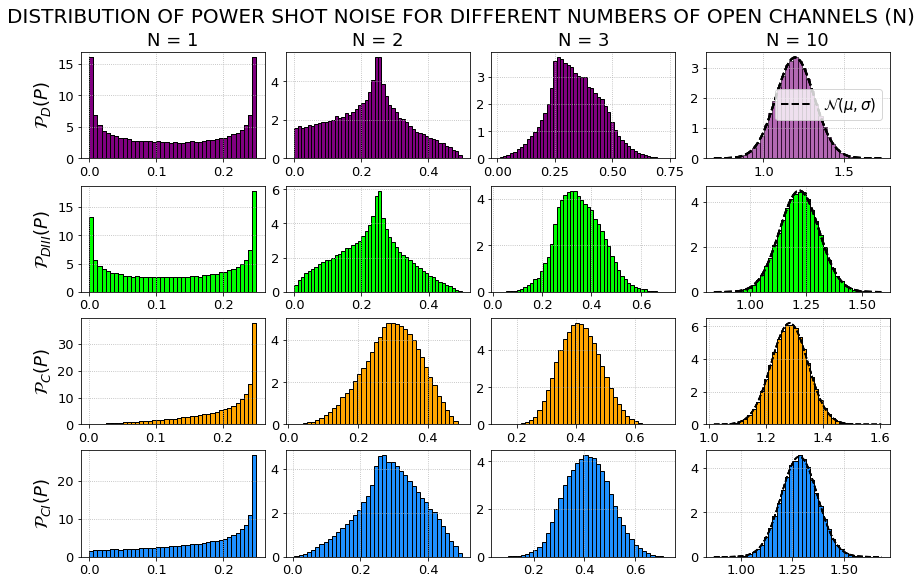

In [13]:
steps = 50

fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,4):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 0):
            
            axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(P)$', fontsize = 18)
            axs[1,0].set_ylabel(r'$\mathcal{P}_{DIII}(P)$', fontsize = 18)
            axs[2,0].set_ylabel(r'$\mathcal{P}_{C}(P)$', fontsize = 18)
            axs[3,0].set_ylabel(r'$\mathcal{P}_{CI}(P)$', fontsize = 18)
            
            axs[0,0].set_title('N = 1', fontsize = 18) 
            
            axs[0,0].hist(P_D[:,0], bins = 40, color='purple', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,0].hist(P_DIII[:,0], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,0].hist(P_C[:,0], bins = 40, color='orange', alpha=1, density = True, histtype='bar', ec='black');
            axs[3,0].hist(P_CI[:,0], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');

            
        elif (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(P_D[:,9], bins = 40, color='purple', alpha=0.2, density = True, histtype='bar', ec='black');
            axs[1,3].hist(P_DIII[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(P_C[:,9], bins = 40, color='orange', alpha=1, density = True, histtype='bar', ec='black');
            axs[3,3].hist(P_CI[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');

            x = np.linspace(np.min(P_D[:,9]), np.max(P_D[:,9]), 100)
            axs[0,3].plot(x,Gaussian(P_D[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 2, linestyle = 'dashed')
            
            x = np.linspace(np.min(P_DIII[:,9]), np.max(P_DIII[:,9]), 100)
            axs[1,3].plot(x,Gaussian(P_DIII[:,9]), color = 'black', alpha = 1, linewidth = 2, linestyle = 'dashed')

            x = np.linspace(np.min(P_C[:,9]), np.max(P_C[:,9]), 100)
            axs[2,3].plot(x,Gaussian(P_C[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(P_CI[:,9]), np.max(P_CI[:,9]), 100)
            axs[3,3].plot(x,Gaussian(P_CI[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(P_D[:,j], bins = 50, color='purple', label = r'D', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(P_DIII[:,j], bins = 50, color='lime', label = r'DIII', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(P_C[:,j], bins = 40, color='orange', label = r'C', alpha=1, density = True, histtype='bar', ec='black');
                    else:
                        if (i == 3):
                            axs[i,j].hist(P_CI[:,j], bins = 40, color='dodgerblue', label = r'CI', alpha=1, density = True, histtype='bar', ec='black');
            
        
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15, loc = 'best')
        
        axs[i,j].grid(linestyle=':')

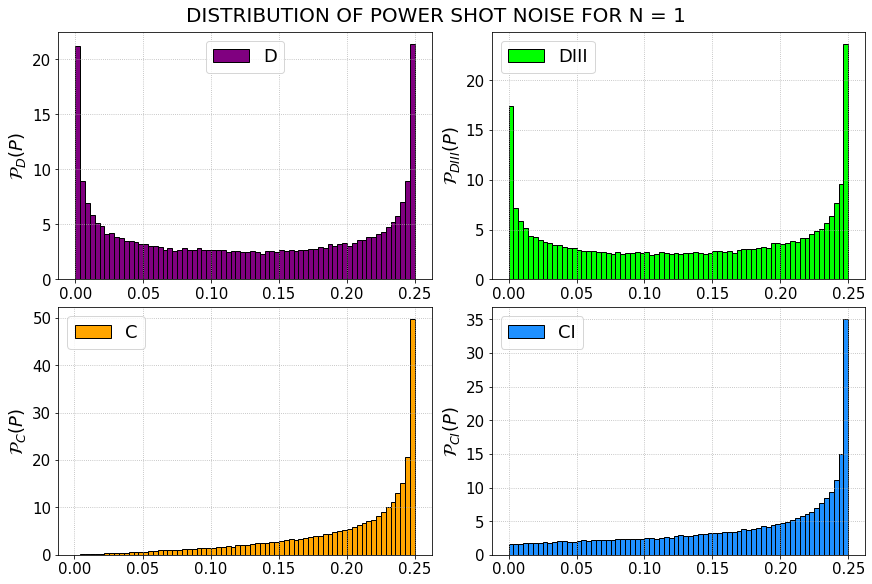

In [14]:
steps = 50

fig, axs = plt.subplots(2,2, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE FOR N = 1', fontsize = 20)

         
axs[0,0].hist(P_D[:,0], bins = 70, color='purple', label = 'D', alpha=1, density = True, histtype='bar', ec='black');
axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(P)$', fontsize = 18)
axs[0,0].legend(fontsize = 18, loc = 'best')

axs[0,1].hist(P_DIII[:,0], bins = 70, color='lime', label = 'DIII', alpha=1, density = True, histtype='bar', ec='black');
axs[0,1].set_ylabel(r'$\mathcal{P}_{DIII}(P)$', fontsize = 18)
axs[0,1].legend(fontsize = 18, loc = 'best')

axs[1,0].hist(P_C[:,0], bins = 70, color='orange', label = 'C', alpha=1, density = True, histtype='bar', ec='black');
axs[1,0].set_ylabel(r'$\mathcal{P}_{C}(P)$', fontsize = 18)
axs[1,0].legend(fontsize = 18, loc = 'best')

axs[1,1].hist(P_CI[:,0], bins = 70, color='dodgerblue', label = 'CI', alpha=1, density = True, histtype='bar', ec='black');
axs[1,1].set_ylabel(r'$\mathcal{P}_{CI}(P)$', fontsize = 18)
axs[1,1].legend(fontsize = 18, loc = 'best')

for i in range(2):
    for j in range(2):
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 15)
        axs[i,j].grid(linestyle=':')

In [15]:
meanG_D = np.mean(G_D, axis = 0)
meanG_DIII = np.mean(G_DIII, axis = 0)
meanG_C = np.mean(G_C, axis = 0)
meanG_CI = np.mean(G_CI, axis = 0)

varG_D = np.var(G_D, axis = 0)
varG_DIII = np.var(G_DIII, axis = 0)
varG_C = np.var(G_C, axis = 0)
varG_CI = np.var(G_CI, axis = 0)

meanP_D = np.mean(P_D, axis = 0)
meanP_DIII = np.mean(P_DIII, axis = 0)
meanP_C = np.mean(P_C, axis = 0)
meanP_CI = np.mean(P_CI, axis = 0)

varP_D = np.var(P_D, axis = 0)
varP_DIII = np.var(P_DIII, axis = 0)
varP_C = np.var(P_C, axis = 0)
varP_CI = np.var(P_CI, axis = 0)

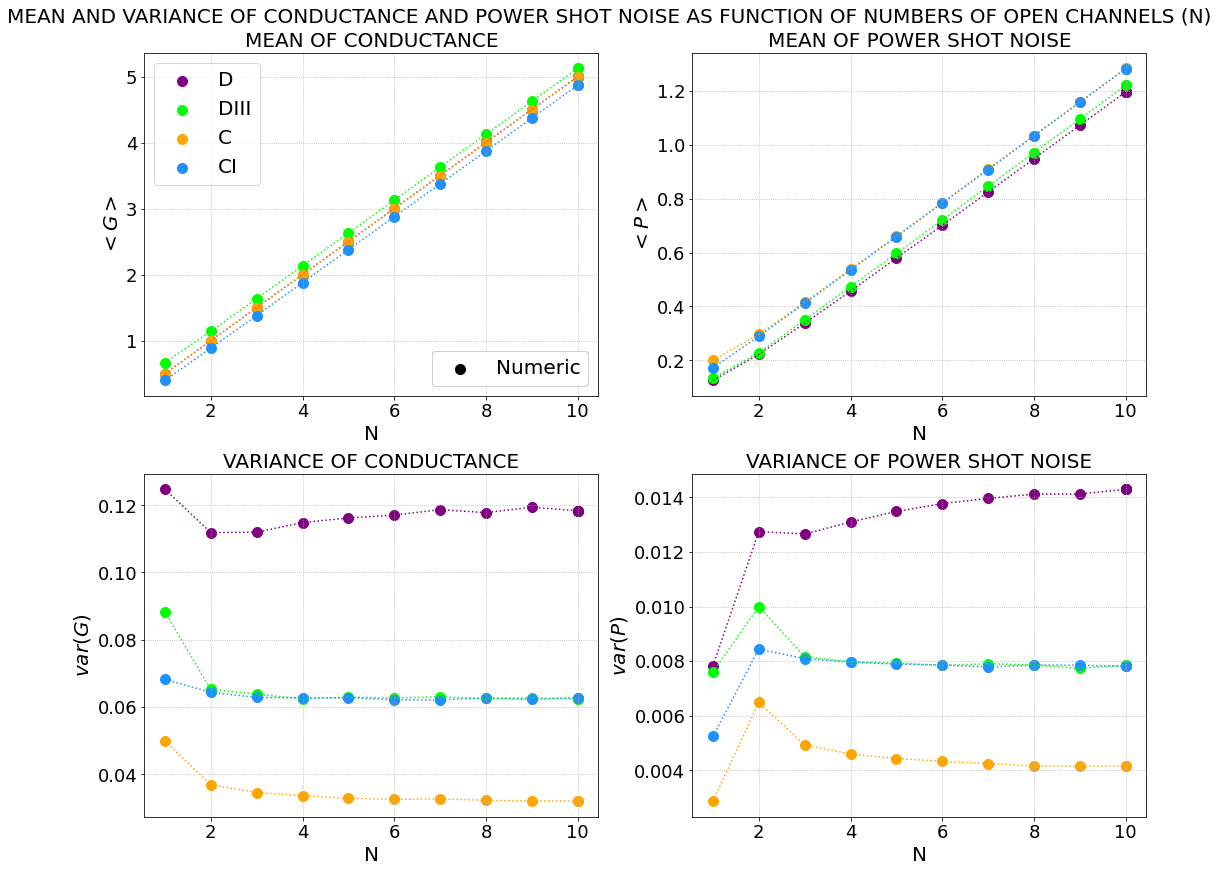

In [16]:
#meanG_O_aux = np.empty(10, dtype = float)
#meanG_U_aux = np.empty(10, dtype = float)
#meanG_S_aux = np.empty(10, dtype = float)

#varG_O_aux = np.empty(10, dtype = float)
#varG_U_aux = np.empty(10, dtype = float)
#varG_S_aux = np.empty(10, dtype = float)

#for N1 in range(1,11):
    
#    N2 = N1
#    NT = N1 + N2

#    meanG_O_aux[N1-1] = (1/2)*(4*1*(N1*N2*NT))/((1*NT+1)*(2*NT-1))
#    meanG_U_aux[N1-1] = (1/2)*(4*2*(N1*N2*NT))/((2*NT+1)*(2*NT-1))
#    meanG_S_aux[N1-1] = (1/2)*(4*4*(N1*N2*NT))/((4*NT+1)*(2*NT-1))
#    
#    varG_O_aux[N1-1] = (1/4)*(16*N1*N2*NT*(3+2*np.power(NT,3)+4*N1*N2*np.power(NT,2)-4*NT-4*N1*N2-5*np.power(N1,2)-5*np.power(N2,2)))/((2*NT-3)*((np.power((2*NT-1),2)))*(NT+3)*(np.power((NT+1),2))*(2*NT+1))
#    varG_U_aux[N1-1] = (1/4)*(8*N1*N2*(3+16*N1*N2*np.power(NT,2)-6*np.power(NT,2)-6*np.power(N1,2)-6*np.power(N2,2)))/((2*NT-3)*(2*NT+3)*(np.power((2*NT+1),2))*(np.power((2*NT-1),2)))
#    varG_S_aux[N1-1] = (1/4)*(32*N1*N2*NT*(3-16*N1*N2+8*NT-20*np.power(N1,2)-20*np.power(N2,2)-16*np.power(NT,3)+64*N1*N2*np.power(NT,2)))/((4*NT+3)*(np.power((4*NT+1),2))*(2*NT-3)*(np.power((2*NT-1),2))*(4*NT-1))

fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'MEAN AND VARIANCE OF CONDUCTANCE AND POWER SHOT NOISE AS FUNCTION OF NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('MEAN OF CONDUCTANCE', fontsize = 20)
            axs[0,0].set_ylabel(r'$<G>$', fontsize = 20)
            
            variable_D = meanG_D; variable_DIII = meanG_DIII; variable_C = meanG_C; variable_CI = meanG_CI
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('VARIANCE OF CONDUCTANCE', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(G)$', fontsize = 20)
            
                variable_D = varG_D; variable_DIII = varG_DIII; variable_C = varG_C; variable_CI = varG_CI
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('MEAN OF POWER SHOT NOISE', fontsize = 20)
                    axs[0,1].set_ylabel(r'$<P>$', fontsize = 20)
                    
                    variable_D = meanP_D; variable_DIII = meanP_DIII; variable_C = meanP_C; variable_CI = meanP_CI
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('VARIANCE OF POWER SHOT NOISE', fontsize = 20)
                        axs[1,1].set_ylabel(r'$var(P)$', fontsize = 20)
                        #axs[1,1].set_ylim([0,0.018])

                        variable_D = varP_D; variable_DIII = varP_DIII; variable_C = varP_C; variable_CI = varP_CI
        
        
        for k in range(0,len(meanG_D)):
            axs[i,j].scatter((k+1), variable_D[k], s = 100, color = 'purple', alpha = 1)
            axs[i,j].scatter((k+1), variable_DIII[k], s = 100, color = 'lime', alpha = 1)
            axs[i,j].scatter((k+1), variable_C[k], s = 100, color = 'orange', alpha = 1)
            axs[i,j].scatter((k+1), variable_CI[k], s = 100, color = 'dodgerblue', alpha = 1)
            
            if k == (len(meanG_D)-1):
                Numeric_scatter = axs[i,j].scatter((k+1), variable_D[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                Class_D = axs[i,j].scatter((k+1), variable_D[k], label = r'D', s = 100, color = 'purple', alpha = 1)
                Class_DIII = axs[i,j].scatter((k+1), variable_DIII[k], label = r'DIII', s = 100, color = 'lime', alpha = 1)
                Class_C = axs[i,j].scatter((k+1), variable_C[k], label = r'C', s = 100, color = 'orange', alpha = 1)
                Class_CI = axs[i,j].scatter((k+1), variable_CI[k], label = r'CI', s = 100, color = 'dodgerblue', alpha = 1)

        axs[i,j].plot([i for i in range(1,11)], variable_D, color = 'purple', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_DIII, color = 'lime', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_C, color = 'orange', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_CI, color = 'dodgerblue', linestyle = ':')
        
#        if (i == 0 and j == 0):
#            Exact_plot, = axs[0,0].plot([i for i in range(1,11)], meanG_O_aux, label = 'Exact', color = 'black', linestyle = '-')
#            axs[0,0].plot([i for i in range(1,11)], meanG_O_aux, color = 'dodgerblue', linestyle = '-')
#            axs[0,0].plot([i for i in range(1,11)], meanG_U_aux, color = 'red', linestyle = '-')
#            axs[0,0].plot([i for i in range(1,11)], meanG_S_aux, color = 'lime', linestyle = '-')
        
#        if (i == 1 and j == 0):
#            axs[1,0].plot([i for i in range(1,11)], varG_O_aux , color = 'dodgerblue', linestyle = '-')
#            axs[1,0].plot([i for i in range(1,11)], varG_U_aux, color = 'red', linestyle = '-')
#            axs[1,0].plot([i for i in range(1,11)], varG_S_aux, color = 'lime', linestyle = '-')

        axs[i,j].grid(linestyle=':')
        first_legend = axs[0,0].legend([Numeric_scatter], ["Numeric"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([Class_D, Class_DIII, Class_C, Class_CI], [r'D', r'DIII', r'C', r'CI'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel('N', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)

In [17]:
meanG_U = np.empty(10, dtype = float)

for i in range(10):
    N1 = i+1
    N2 = N1
    meanG_U[i] = N1*N2/(N1+N2)

[ 0.00181642  0.00012538  0.0005787   0.00025607  0.00128819  0.00083106
  0.00092721 -0.00012178  0.00115743 -0.00094757]


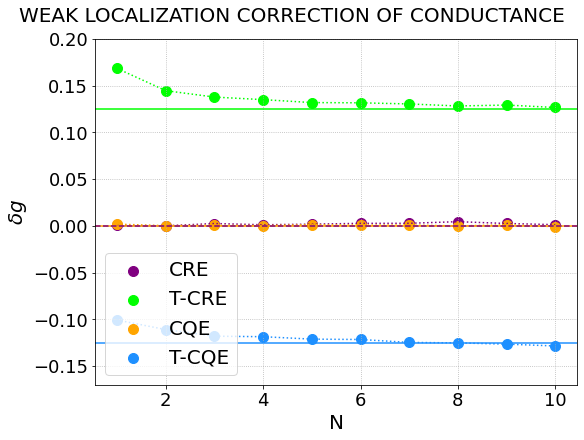

In [18]:
delta_g_D = ((1/1)*(1-2-(-1)))*(1/4)
delta_g_DIII = ((1/2)*(2-2-(-1)))*(1/4)
delta_g_C = ((1/4)*(4-2-(2)))*(1/4)
delta_g_CI = ((1/2)*(2-2-(1)))*(1/4)

fig, axs = plt.subplots(1,1, figsize = (8,6), constrained_layout = True)

fig.suptitle(r'WEAK LOCALIZATION CORRECTION OF CONDUCTANCE', fontsize = 20)

axs.plot([i for i in range(1,11)], (meanG_D - meanG_U), color = 'purple', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], (meanG_DIII - meanG_U), color = 'lime', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], (meanG_C - meanG_U), color = 'orange', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], (meanG_CI - meanG_U), color = 'dodgerblue', linestyle = ':', alpha = 1)

axs.scatter([i for i in range(1,11)], (meanG_D - meanG_U), label = 'CRE', s = 100, color = 'purple', alpha = 1)
axs.scatter([i for i in range(1,11)], (meanG_DIII - meanG_U), label = 'T-CRE' , s = 100, color = 'lime', alpha = 1)
axs.scatter([i for i in range(1,11)], (meanG_C - meanG_U), label = 'CQE', s = 100, color = 'orange', alpha = 1)
axs.scatter([i for i in range(1,11)], (meanG_CI - meanG_U), label = 'T-CQE', s = 100, color = 'dodgerblue', alpha = 1)

axs.set_xlabel('N', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.set_ylabel(r'$\delta g$', fontsize = 20)
axs.grid(linestyle=':')
axs.legend(loc = "lower left", fontsize = 20)

axs.axhline(y=delta_g_CI, color='dodgerblue', linestyle='-')
axs.axhline(y=delta_g_C, color='orange', linestyle='-')
axs.axhline(y=delta_g_DIII, color='lime', linestyle='-')
axs.axhline(y=delta_g_D, color='purple', linestyle='dashed')

axs.set_ylim([-0.17, 0.2])

print(meanG_C-meanG_U)

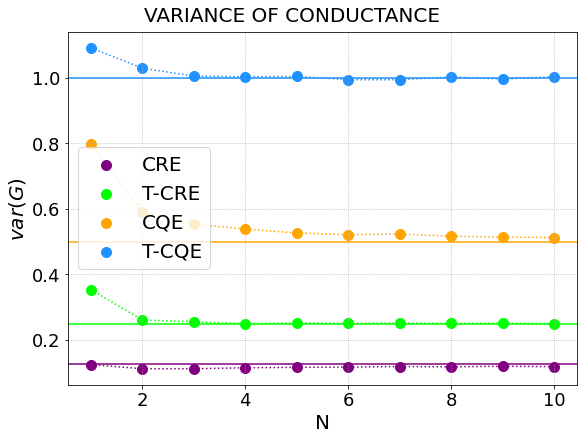

In [19]:
varG_D_aux = np.var(G_D, axis = 0)
varG_DIII_aux = np.var(2*G_DIII, axis = 0)
varG_C_aux = np.var(4*G_C, axis = 0)
varG_CI_aux = np.var(4*G_CI, axis = 0)

fig, axs = plt.subplots(1,1, figsize = (8,6), constrained_layout = True)

fig.suptitle(r'VARIANCE OF CONDUCTANCE', fontsize = 20)

axs.plot([i for i in range(1,11)], varG_D_aux, color = 'purple', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], varG_DIII_aux, color = 'lime', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], varG_C_aux, color = 'orange', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], varG_CI_aux, color = 'dodgerblue', linestyle = ':', alpha = 1)

axs.scatter([i for i in range(1,11)], varG_D_aux, label = 'CRE', s = 100, color = 'purple', alpha = 1)
axs.scatter([i for i in range(1,11)], varG_DIII_aux, label = 'T-CRE' , s = 100, color = 'lime', alpha = 1)
axs.scatter([i for i in range(1,11)], varG_C_aux, label = 'CQE', s = 100, color = 'orange', alpha = 1)
axs.scatter([i for i in range(1,11)], varG_CI_aux, label = 'T-CQE', s = 100, color = 'dodgerblue', alpha = 1)

axs.set_xlabel('N', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.set_ylabel(r'$var(G)$', fontsize = 20)
axs.grid(linestyle=':')
axs.legend(loc = "best", fontsize = 20)

axs.axhline(y=(1/1), color='dodgerblue', linestyle='-')
axs.axhline(y=(1/2), color='orange', linestyle='-')
axs.axhline(y=(1/4), color='lime', linestyle='-')
axs.axhline(y=(1/8), color='purple', linestyle='-')

In [20]:
df_G_D_Gamma_N1 = pd.read_csv(r'Gamma/Andreev_G_D_Gamma_N1.txt', sep='\t', header = None)
df_G_DIII_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_DIII_Gamma_N1.txt', sep='\t', header = None)
df_G_C_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_C_Gamma_N1.txt', sep='\t', header = None)
df_G_CI_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_CI_Gamma_N1.txt', sep='\t', header = None)

df_G_D_Gamma_N2 = pd.read_csv(r'Gamma/Andreev_G_D_Gamma_N2.txt', sep='\t', header = None)
df_G_DIII_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_DIII_Gamma_N2.txt', sep='\t', header = None)
df_G_C_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_C_Gamma_N2.txt', sep='\t', header = None)
df_G_CI_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_CI_Gamma_N2.txt', sep='\t', header = None)

df_G_D_Gamma_N3 = pd.read_csv(r'Gamma/Andreev_G_D_Gamma_N3.txt', sep='\t', header = None)
df_G_DIII_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_DIII_Gamma_N3.txt', sep='\t', header = None)
df_G_C_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_C_Gamma_N3.txt', sep='\t', header = None)
df_G_CI_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_CI_Gamma_N3.txt', sep='\t', header = None)

df_G_D_Gamma_N10 = pd.read_csv(r'Gamma/Andreev_G_D_Gamma_N10.txt', sep='\t', header = None)
df_G_DIII_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_DIII_Gamma_N10.txt', sep='\t', header = None)
df_G_C_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_C_Gamma_N10.txt', sep='\t', header = None)
df_G_CI_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Andreev_G_CI_Gamma_N10.txt', sep='\t', header = None)

G_D_Gamma_N1 = df_G_D_Gamma_N1.values
G_DIII_Gamma_N1 = df_G_DIII_Gamma_N1.values
G_C_Gamma_N1 = df_G_C_Gamma_N1.values
G_CI_Gamma_N1 = df_G_CI_Gamma_N1.values

G_D_Gamma_N2 = df_G_D_Gamma_N2.values
G_DIII_Gamma_N2 = df_G_DIII_Gamma_N2.values
G_C_Gamma_N2 = df_G_C_Gamma_N2.values
G_CI_Gamma_N2 = df_G_CI_Gamma_N2.values

G_D_Gamma_N3 = df_G_D_Gamma_N3.values
G_DIII_Gamma_N3 = df_G_DIII_Gamma_N3.values
G_C_Gamma_N3 = df_G_C_Gamma_N3.values
G_CI_Gamma_N3 = df_G_CI_Gamma_N3.values

G_D_Gamma_N10 = df_G_D_Gamma_N10.values
G_DIII_Gamma_N10 = df_G_DIII_Gamma_N10.values
G_C_Gamma_N10 = df_G_C_Gamma_N10.values
G_CI_Gamma_N10 = df_G_CI_Gamma_N10.values

In [21]:
meanG_D_1 = np.mean(G_D_Gamma_N1, axis = 0)
meanG_DIII_1 = np.mean(G_DIII_Gamma_N1, axis = 0)
meanG_C_1 = np.mean(G_C_Gamma_N1, axis = 0)
meanG_CI_1 = np.mean(G_CI_Gamma_N1, axis = 0)

meanG_D_2 = np.mean(G_D_Gamma_N2, axis = 0)
meanG_DIII_2 = np.mean(G_DIII_Gamma_N2, axis = 0)
meanG_C_2 = np.mean(G_C_Gamma_N2, axis = 0)
meanG_CI_2 = np.mean(G_CI_Gamma_N2, axis = 0)

meanG_D_3 = np.mean(G_D_Gamma_N3, axis = 0)
meanG_DIII_3 = np.mean(G_DIII_Gamma_N3, axis = 0)
meanG_C_3 = np.mean(G_C_Gamma_N3, axis = 0)
meanG_CI_3 = np.mean(G_CI_Gamma_N3, axis = 0)

meanG_D_10 = np.mean(G_D_Gamma_N10, axis = 0)
meanG_DIII_10 = np.mean(G_DIII_Gamma_N10, axis = 0)
meanG_C_10 = np.mean(G_C_Gamma_N10, axis = 0)
meanG_CI_10 = np.mean(G_CI_Gamma_N10, axis = 0)

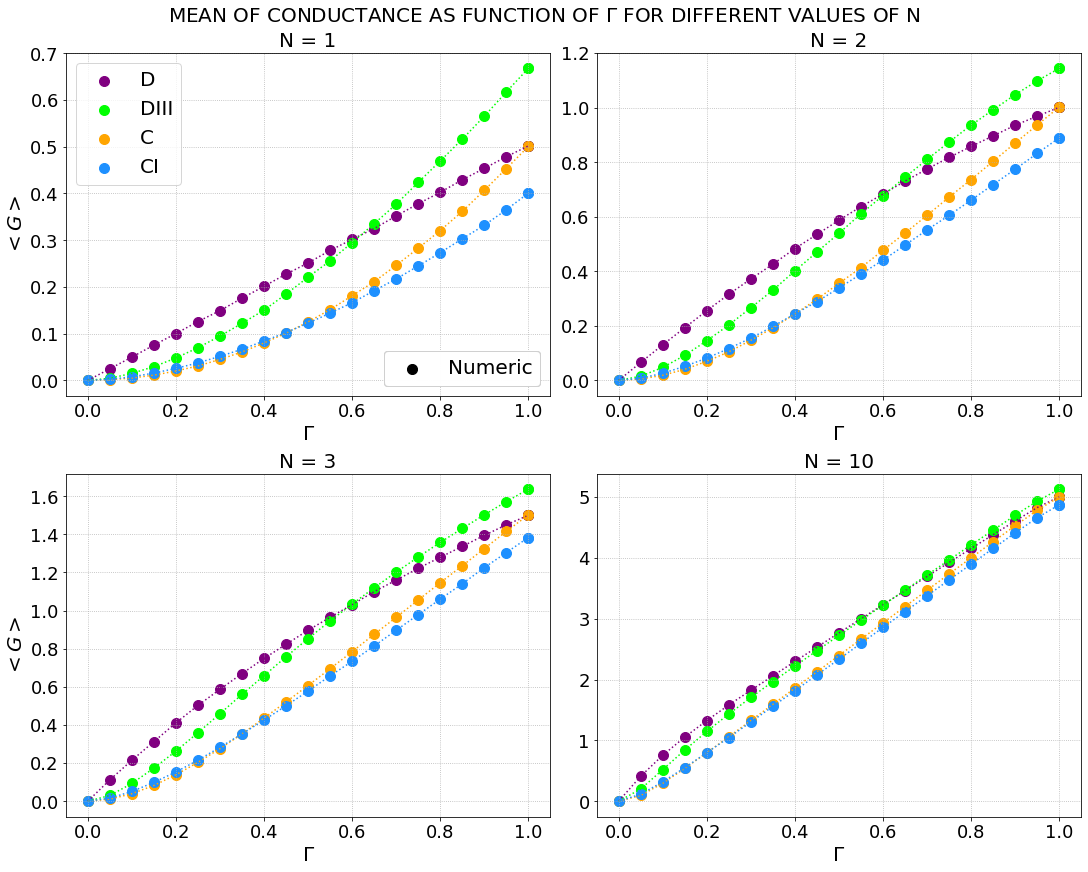

In [22]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'MEAN OF CONDUCTANCE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$<G>$', fontsize = 20)
            
            variable_D = meanG_D_1; variable_DIII = meanG_DIII_1; variable_C = meanG_C_1; variable_CI = meanG_CI_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$<G>$', fontsize = 20)
            
                variable_D = meanG_D_3; variable_DIII = meanG_DIII_3; variable_C = meanG_C_3; variable_CI = meanG_CI_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_D = meanG_D_2; variable_DIII = meanG_DIII_2; variable_C = meanG_C_2; variable_CI = meanG_CI_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_D = meanG_D_10; variable_DIII = meanG_DIII_10; variable_C = meanG_C_10; variable_CI = meanG_CI_10
        
        for k in range(0,len(meanG_D_1)):
            axs[i,j].scatter((k)/20, variable_D[k], s = 100, color = 'purple', alpha = 1)
            axs[i,j].scatter((k)/20, variable_DIII[k], s = 100, color = 'lime', alpha = 1)
            axs[i,j].scatter((k)/20, variable_C[k], s = 100, color = 'orange', alpha = 1)
            axs[i,j].scatter((k)/20, variable_CI[k], s = 100, color = 'dodgerblue', alpha = 1)
            
            if k == (len(meanG_D_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_D[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                Class_D = axs[i,j].scatter((k)/20, variable_D[k], label = r'$D$', s = 100, color = 'purple', alpha = 1)
                Class_DIII = axs[i,j].scatter((k)/20, variable_DIII[k], label = r'$DIII$', s = 100, color = 'lime', alpha = 1)
                Class_C = axs[i,j].scatter((k)/20, variable_C[k], label = r'$C$', s = 100, color = 'orange', alpha = 1)
                Class_CI = axs[i,j].scatter((k)/20, variable_CI[k], label = r'$CI$', s = 100, color = 'dodgerblue', alpha = 1)

        axs[i,j].plot([i/20 for i in range(0,21)], variable_D, color = 'purple', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_DIII, color = 'lime', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_C, color = 'orange', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_CI, color = 'dodgerblue', linestyle = ':')
        
        axs[i,j].grid(linestyle=':')
        
        first_legend = axs[0,0].legend([Numeric_scatter], ["Numeric"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([Class_D, Class_DIII, Class_C, Class_CI], [r'D', r'DIII',r'C',r'CI'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        N = N + 1

In [23]:
df_P_D_Gamma_N1 = pd.read_csv(r'Gamma/Andreev_P_D_Gamma_N1.txt', sep='\t', header = None)
df_P_DIII_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_DIII_Gamma_N1.txt', sep='\t', header = None)
df_P_C_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_C_Gamma_N1.txt', sep='\t', header = None)
df_P_CI_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_CI_Gamma_N1.txt', sep='\t', header = None)

df_P_D_Gamma_N2 = pd.read_csv(r'Gamma/Andreev_P_D_Gamma_N2.txt', sep='\t', header = None)
df_P_DIII_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_DIII_Gamma_N2.txt', sep='\t', header = None)
df_P_C_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_C_Gamma_N2.txt', sep='\t', header = None)
df_P_CI_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_CI_Gamma_N2.txt', sep='\t', header = None)

df_P_D_Gamma_N3 = pd.read_csv(r'Gamma/Andreev_P_D_Gamma_N3.txt', sep='\t', header = None)
df_P_DIII_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_DIII_Gamma_N3.txt', sep='\t', header = None)
df_P_C_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_C_Gamma_N3.txt', sep='\t', header = None)
df_P_CI_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_CI_Gamma_N3.txt', sep='\t', header = None)

df_P_D_Gamma_N10 = pd.read_csv(r'Gamma/Andreev_P_D_Gamma_N10.txt', sep='\t', header = None)
df_P_DIII_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_DIII_Gamma_N10.txt', sep='\t', header = None)
df_P_C_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_C_Gamma_N10.txt', sep='\t', header = None)
df_P_CI_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Andreev_P_CI_Gamma_N10.txt', sep='\t', header = None)

P_D_Gamma_N1 = df_P_D_Gamma_N1.values
P_DIII_Gamma_N1 = df_P_DIII_Gamma_N1.values
P_C_Gamma_N1 = df_P_C_Gamma_N1.values
P_CI_Gamma_N1 = df_P_CI_Gamma_N1.values

P_D_Gamma_N2 = df_P_D_Gamma_N2.values
P_DIII_Gamma_N2 = df_P_DIII_Gamma_N2.values
P_C_Gamma_N2 = df_P_C_Gamma_N2.values
P_CI_Gamma_N2 = df_P_CI_Gamma_N2.values

P_D_Gamma_N3 = df_P_D_Gamma_N3.values
P_DIII_Gamma_N3 = df_P_DIII_Gamma_N3.values
P_C_Gamma_N3 = df_P_C_Gamma_N3.values
P_CI_Gamma_N3 = df_P_CI_Gamma_N3.values

P_D_Gamma_N10 = df_P_D_Gamma_N10.values
P_DIII_Gamma_N10 = df_P_DIII_Gamma_N10.values
P_C_Gamma_N10 = df_P_C_Gamma_N10.values
P_CI_Gamma_N10 = df_P_CI_Gamma_N10.values

In [24]:
meanP_D_1 = np.mean(P_D_Gamma_N1, axis = 0)
meanP_DIII_1 = np.mean(P_DIII_Gamma_N1, axis = 0)
meanP_C_1 = np.mean(P_C_Gamma_N1, axis = 0)
meanP_CI_1 = np.mean(P_CI_Gamma_N1, axis = 0)

meanP_D_2 = np.mean(P_D_Gamma_N2, axis = 0)
meanP_DIII_2 = np.mean(P_DIII_Gamma_N2, axis = 0)
meanP_C_2 = np.mean(P_C_Gamma_N2, axis = 0)
meanP_CI_2 = np.mean(P_CI_Gamma_N2, axis = 0)

meanP_D_3 = np.mean(P_D_Gamma_N3, axis = 0)
meanP_DIII_3 = np.mean(P_DIII_Gamma_N3, axis = 0)
meanP_C_3 = np.mean(P_C_Gamma_N3, axis = 0)
meanP_CI_3 = np.mean(P_CI_Gamma_N3, axis = 0)

meanP_D_10 = np.mean(P_D_Gamma_N10, axis = 0)
meanP_DIII_10 = np.mean(P_DIII_Gamma_N10, axis = 0)
meanP_C_10 = np.mean(P_C_Gamma_N10, axis = 0)
meanP_CI_10 = np.mean(P_CI_Gamma_N10, axis = 0)

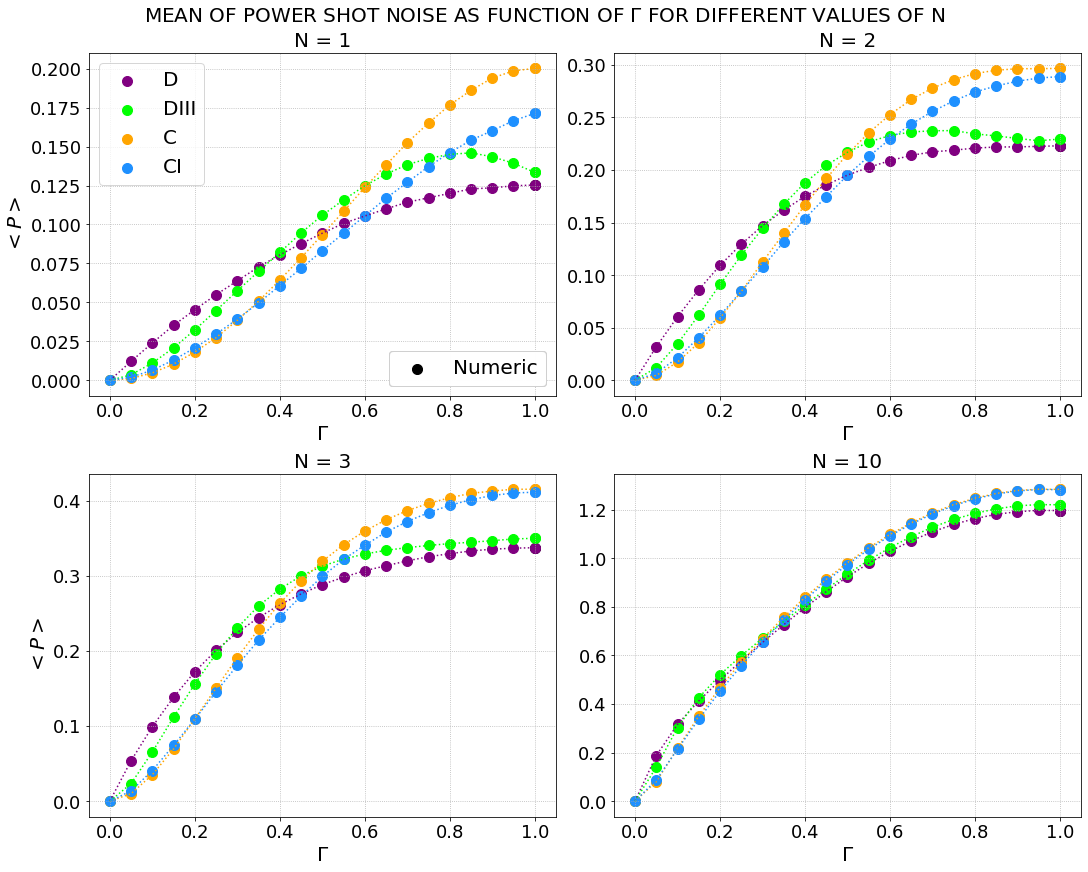

In [25]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'MEAN OF POWER SHOT NOISE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$<P>$', fontsize = 20)
            
            variable_D = meanP_D_1; variable_DIII = meanP_DIII_1; variable_C = meanP_C_1; variable_CI = meanP_CI_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$<P>$', fontsize = 20)
            
                variable_D = meanP_D_3; variable_DIII = meanP_DIII_3; variable_C = meanP_C_3; variable_CI = meanP_CI_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_D = meanP_D_2; variable_DIII = meanP_DIII_2; variable_C = meanP_C_2; variable_CI = meanP_CI_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_D = meanP_D_10; variable_DIII = meanP_DIII_10; variable_C = meanP_C_10; variable_CI = meanP_CI_10
        
        for k in range(0,len(meanG_D_1)):
            axs[i,j].scatter((k)/20, variable_D[k], s = 100, color = 'purple', alpha = 1)
            axs[i,j].scatter((k)/20, variable_DIII[k], s = 100, color = 'lime', alpha = 1)
            axs[i,j].scatter((k)/20, variable_C[k], s = 100, color = 'orange', alpha = 1)
            axs[i,j].scatter((k)/20, variable_CI[k], s = 100, color = 'dodgerblue', alpha = 1)
            
            if k == (len(meanG_D_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_D[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                Class_D = axs[i,j].scatter((k)/20, variable_D[k], label = r'$D$', s = 100, color = 'purple', alpha = 1)
                Class_DIII = axs[i,j].scatter((k)/20, variable_DIII[k], label = r'$DIII$', s = 100, color = 'lime', alpha = 1)
                Class_C = axs[i,j].scatter((k)/20, variable_C[k], label = r'$C$', s = 100, color = 'orange', alpha = 1)
                Class_CI = axs[i,j].scatter((k)/20, variable_CI[k], label = r'$CI$', s = 100, color = 'dodgerblue', alpha = 1)

        axs[i,j].plot([i/20 for i in range(0,21)], variable_D, color = 'purple', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_DIII, color = 'lime', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_C, color = 'orange', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_CI, color = 'dodgerblue', linestyle = ':')
        
        axs[i,j].grid(linestyle=':')
        
        first_legend = axs[0,0].legend([Numeric_scatter], ["Numeric"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([Class_D, Class_DIII, Class_C, Class_CI], [r'D', r'DIII',r'C',r'CI'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        N = N + 1

In [26]:
varG_D_1 = np.var(G_D_Gamma_N1, axis = 0)
varG_DIII_1 = np.var(G_DIII_Gamma_N1, axis = 0)
varG_C_1 = np.var(G_C_Gamma_N1, axis = 0)
varG_CI_1 = np.var(G_CI_Gamma_N1, axis = 0)

varG_D_2 = np.var(G_D_Gamma_N2, axis = 0)
varG_DIII_2 = np.var(G_DIII_Gamma_N2, axis = 0)
varG_C_2 = np.var(G_C_Gamma_N2, axis = 0)
varG_CI_2 = np.var(G_CI_Gamma_N2, axis = 0)

varG_D_3 = np.var(G_D_Gamma_N3, axis = 0)
varG_DIII_3 = np.var(G_DIII_Gamma_N3, axis = 0)
varG_C_3 = np.var(G_C_Gamma_N3, axis = 0)
varG_CI_3 = np.var(G_CI_Gamma_N3, axis = 0)

varG_D_10 = np.var(G_D_Gamma_N10, axis = 0)
varG_DIII_10 = np.var(G_DIII_Gamma_N10, axis = 0)
varG_C_10 = np.var(G_C_Gamma_N10, axis = 0)
varG_CI_10 = np.var(G_CI_Gamma_N10, axis = 0)

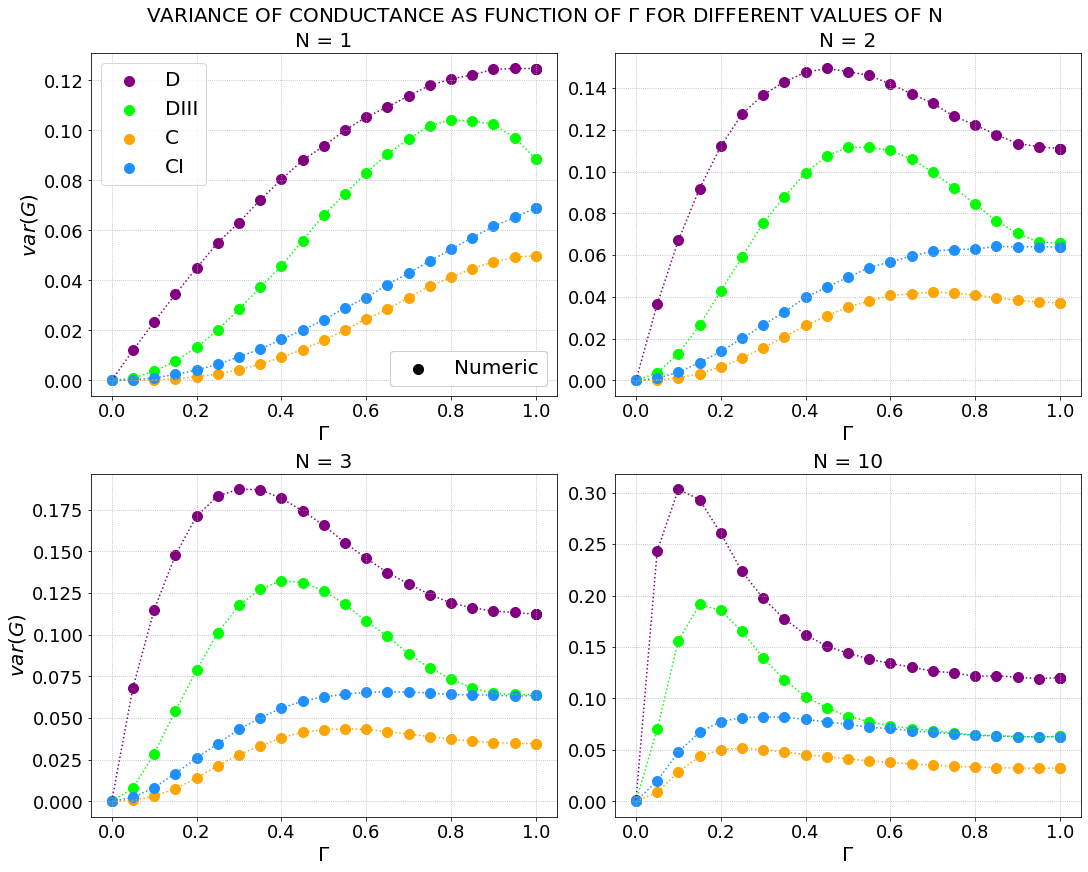

In [27]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'VARIANCE OF CONDUCTANCE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$var(G)$', fontsize = 20)
            
            variable_D = varG_D_1; variable_DIII = varG_DIII_1; variable_C = varG_C_1; variable_CI = varG_CI_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(G)$', fontsize = 20)
            
                variable_D = varG_D_3; variable_DIII = varG_DIII_3; variable_C = varG_C_3; variable_CI = varG_CI_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_D = varG_D_2; variable_DIII = varG_DIII_2; variable_C = varG_C_2; variable_CI = varG_CI_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_D = varG_D_10; variable_DIII = varG_DIII_10; variable_C = varG_C_10; variable_CI = varG_CI_10
        
        for k in range(0,len(meanG_D_1)):
            axs[i,j].scatter((k)/20, variable_D[k], s = 100, color = 'purple', alpha = 1)
            axs[i,j].scatter((k)/20, variable_DIII[k], s = 100, color = 'lime', alpha = 1)
            axs[i,j].scatter((k)/20, variable_C[k], s = 100, color = 'orange', alpha = 1)
            axs[i,j].scatter((k)/20, variable_CI[k], s = 100, color = 'dodgerblue', alpha = 1)
            
            if k == (len(meanG_D_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_D[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                Class_D = axs[i,j].scatter((k)/20, variable_D[k], label = r'$D$', s = 100, color = 'purple', alpha = 1)
                Class_DIII = axs[i,j].scatter((k)/20, variable_DIII[k], label = r'$DIII$', s = 100, color = 'lime', alpha = 1)
                Class_C = axs[i,j].scatter((k)/20, variable_C[k], label = r'$C$', s = 100, color = 'orange', alpha = 1)
                Class_CI = axs[i,j].scatter((k)/20, variable_CI[k], label = r'$CI$', s = 100, color = 'dodgerblue', alpha = 1)

        axs[i,j].plot([i/20 for i in range(0,21)], variable_D, color = 'purple', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_DIII, color = 'lime', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_C, color = 'orange', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_CI, color = 'dodgerblue', linestyle = ':')
        
        axs[i,j].grid(linestyle=':')
        
        first_legend = axs[0,0].legend([Numeric_scatter], ["Numeric"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([Class_D, Class_DIII, Class_C, Class_CI], [r'D', r'DIII',r'C',r'CI'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        N = N + 1

In [28]:
varP_D_1 = np.var(P_D_Gamma_N1, axis = 0)
varP_DIII_1 = np.var(P_DIII_Gamma_N1, axis = 0)
varP_C_1 = np.var(P_C_Gamma_N1, axis = 0)
varP_CI_1 = np.var(P_CI_Gamma_N1, axis = 0)

varP_D_2 = np.var(P_D_Gamma_N2, axis = 0)
varP_DIII_2 = np.var(P_DIII_Gamma_N2, axis = 0)
varP_C_2 = np.var(P_C_Gamma_N2, axis = 0)
varP_CI_2 = np.var(P_CI_Gamma_N2, axis = 0)

varP_D_3 = np.var(P_D_Gamma_N3, axis = 0)
varP_DIII_3 = np.var(P_DIII_Gamma_N3, axis = 0)
varP_C_3 = np.var(P_C_Gamma_N3, axis = 0)
varP_CI_3 = np.var(P_CI_Gamma_N3, axis = 0)

varP_D_10 = np.var(P_D_Gamma_N10, axis = 0)
varP_DIII_10 = np.var(P_DIII_Gamma_N10, axis = 0)
varP_C_10 = np.var(P_C_Gamma_N10, axis = 0)
varP_CI_10 = np.var(P_CI_Gamma_N10, axis = 0)

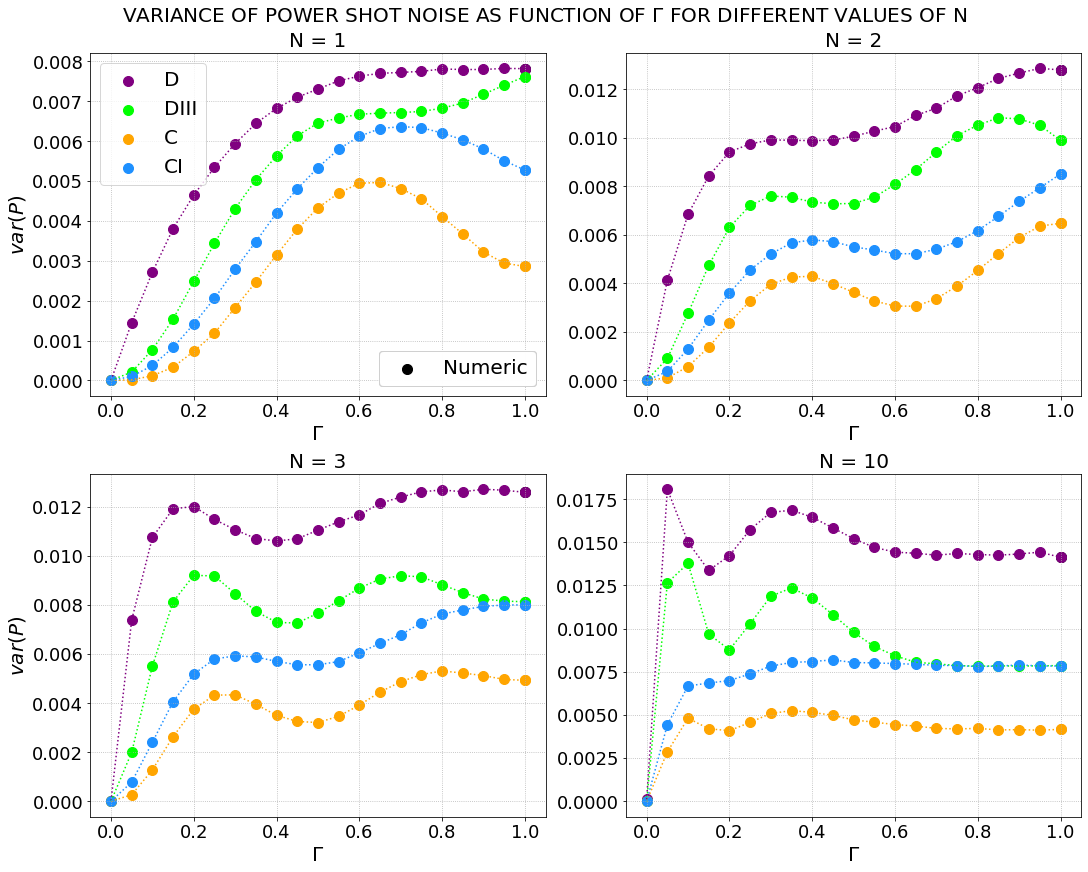

In [29]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'VARIANCE OF POWER SHOT NOISE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$var(P)$', fontsize = 20)
            
            variable_D = varP_D_1; variable_DIII = varP_DIII_1; variable_C = varP_C_1; variable_CI = varP_CI_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(P)$', fontsize = 20)
            
                variable_D = varP_D_3; variable_DIII = varP_DIII_3; variable_C = varP_C_3; variable_CI = varP_CI_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_D = varP_D_2; variable_DIII = varP_DIII_2; variable_C = varP_C_2; variable_CI = varP_CI_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_D = varP_D_10; variable_DIII = varP_DIII_10; variable_C = varP_C_10; variable_CI = varP_CI_10
        
        for k in range(0,len(meanG_D_1)):
            axs[i,j].scatter((k)/20, variable_D[k], s = 100, color = 'purple', alpha = 1)
            axs[i,j].scatter((k)/20, variable_DIII[k], s = 100, color = 'lime', alpha = 1)
            axs[i,j].scatter((k)/20, variable_C[k], s = 100, color = 'orange', alpha = 1)
            axs[i,j].scatter((k)/20, variable_CI[k], s = 100, color = 'dodgerblue', alpha = 1)
            
            if k == (len(meanG_D_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_D[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                Class_D = axs[i,j].scatter((k)/20, variable_D[k], label = r'$D$', s = 100, color = 'purple', alpha = 1)
                Class_DIII = axs[i,j].scatter((k)/20, variable_DIII[k], label = r'$DIII$', s = 100, color = 'lime', alpha = 1)
                Class_C = axs[i,j].scatter((k)/20, variable_C[k], label = r'$C$', s = 100, color = 'orange', alpha = 1)
                Class_CI = axs[i,j].scatter((k)/20, variable_CI[k], label = r'$CI$', s = 100, color = 'dodgerblue', alpha = 1)

        axs[i,j].plot([i/20 for i in range(0,21)], variable_D, color = 'purple', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_DIII, color = 'lime', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_C, color = 'orange', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_CI, color = 'dodgerblue', linestyle = ':')
        
        axs[i,j].grid(linestyle=':')
        
        first_legend = axs[0,0].legend([Numeric_scatter], ["Numeric"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([Class_D, Class_DIII, Class_C, Class_CI], [r'D', r'DIII',r'C',r'CI'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        N = N + 1

/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


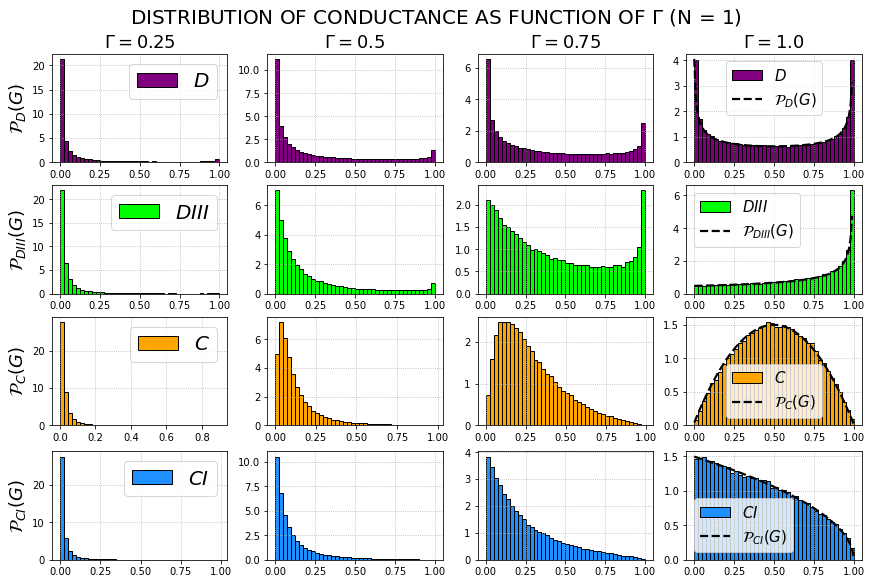

In [30]:
fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE AS FUNCTION OF $\Gamma$ (N = 1)', fontsize = 20)

for j in range(0,4):
    
    gamma_idx = 5*j+5
    
    gamma_value = 0.25*gamma_idx/5
    
    axs[0,j].hist(G_D_Gamma_N1[:,gamma_idx], bins = 40, color='purple', label = r'$D$', alpha=1, density = True, histtype='bar', ec='black');
    axs[1,j].hist(G_DIII_Gamma_N1[:,gamma_idx], bins = 40, color='lime', label = r'$DIII$', alpha=1, density = True, histtype='bar', ec='black');
    axs[2,j].hist(G_C_Gamma_N1[:,gamma_idx], bins = 40, color='orange', label = r'$C$', alpha=1, density = True, histtype='bar', ec='black');
    axs[3,j].hist(G_CI_Gamma_N1[:,gamma_idx], bins = 40, color='dodgerblue', label = r'$CI$', alpha=1, density = True, histtype='bar', ec='black');
    
    if (j == 3):
        x_D = np.linspace(np.min(G_D[:,0]), np.max(G_D[:,0]), 100)
        axs[0,3].plot(x_D, Distr_D_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
        axs[0,3].legend(fontsize = 15, loc = "best")
            
        x_DIII = np.linspace(np.min(G_DIII[:,0]), np.max(G_DIII[:,0]), 100)
        axs[1,3].plot(x_DIII, Distr_DIII_N1(G_DIII[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
        axs[1,3].legend(fontsize = 15, loc = "best")
                
        x_C = np.linspace(np.min(G_C[:,0]), np.max(G_C[:,0]), 100)
        axs[2,3].plot(x_C, Distr_C_N1(G_C[:,0]), color = 'black', label = r'$\mathcal{P}_{C}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
        axs[2,3].legend(fontsize = 15, loc = "best")

        x_CI = np.linspace(np.min(G_CI[:,0]), np.max(G_CI[:,0]), 100)
        axs[3,3].plot(x_CI, Distr_CI_N1(G_CI[:,0]), color = 'black', label = r'$\mathcal{P}_{CI}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
        axs[3,3].legend(fontsize = 15, loc = "best")
    
    axs[0,j].set_title(r'$\Gamma = $'+ str(gamma_value), fontsize = 18)
    
    axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(G)$', fontsize = 18)
    axs[1,0].set_ylabel(r'$\mathcal{P}_{DIII}(G)$', fontsize = 18)
    axs[2,0].set_ylabel(r'$\mathcal{P}_{C}(G)$', fontsize = 18)
    axs[3,0].set_ylabel(r'$\mathcal{P}_{CI}(G)$', fontsize = 18)
    
    for i in range(0,4):
        axs[i,0].legend(fontsize = 20)
        axs[i,j].grid(linestyle=':')
        

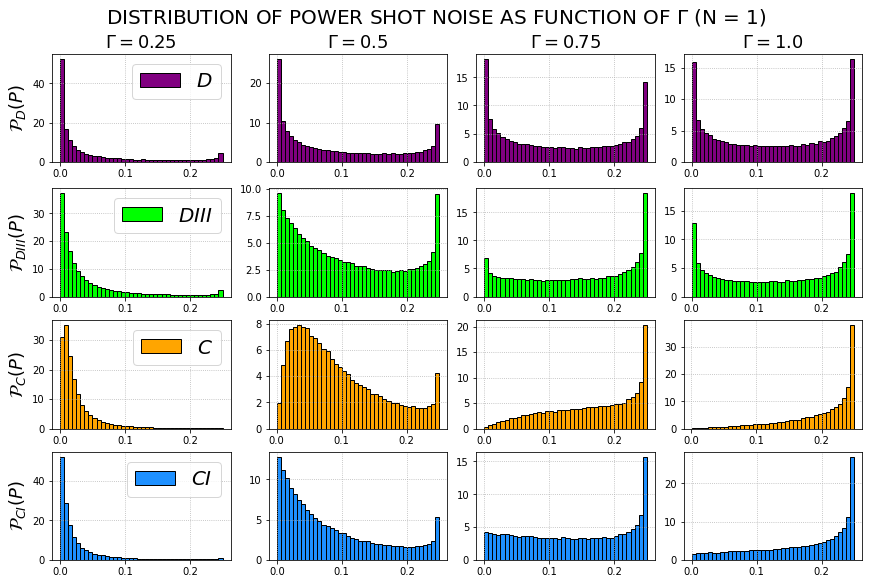

In [31]:
fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE AS FUNCTION OF $\Gamma$ (N = 1)', fontsize = 20)

for j in range(0,4):
    
    gamma_idx = 5*j+5
    
    gamma_value = 0.25*gamma_idx/5
    
    axs[0,j].hist(P_D_Gamma_N1[:,gamma_idx], bins = 40, color='purple', label = r'$D$', alpha=1, density = True, histtype='bar', ec='black');
    axs[1,j].hist(P_DIII_Gamma_N1[:,gamma_idx], bins = 40, color='lime', label = r'$DIII$', alpha=1, density = True, histtype='bar', ec='black');
    axs[2,j].hist(P_C_Gamma_N1[:,gamma_idx], bins = 40, color='orange', label = r'$C$', alpha=1, density = True, histtype='bar', ec='black');
    axs[3,j].hist(P_CI_Gamma_N1[:,gamma_idx], bins = 40, color='dodgerblue', label = r'$CI$', alpha=1, density = True, histtype='bar', ec='black');
    
    
    axs[0,j].set_title(r'$\Gamma = $'+ str(gamma_value), fontsize = 18)
    
    axs[1,0].set_ylabel(r'$\mathcal{P}_{\beta}(P)$', fontsize = 18)
    
    axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(P)$', fontsize = 18)
    axs[1,0].set_ylabel(r'$\mathcal{P}_{DIII}(P)$', fontsize = 18)
    axs[2,0].set_ylabel(r'$\mathcal{P}_{C}(P)$', fontsize = 18)
    axs[3,0].set_ylabel(r'$\mathcal{P}_{CI}(P)$', fontsize = 18)
    
    for i in range(0,4):
        axs[i,0].legend(fontsize = 20)
        axs[i,j].grid(linestyle=':')

In [42]:
meanG_U_1 = [4.42276345e-05, 1.74688624e-02, 3.51545366e-02, 5.40983579e-02, 7.24493113e-02, 9.43385482e-02, 1.13935822e-01, 1.36911921e-01
, 1.58351929e-01, 1.82563785e-01, 2.07181360e-01, 2.32975152e-01,
 2.59490636e-01, 2.86536809e-01, 3.14402916e-01, 3.41832668e-01, 3.72930074e-01, 4.03574574e-01, 4.35441335e-01, 4.67392390e-01,
 4.98967446e-01]

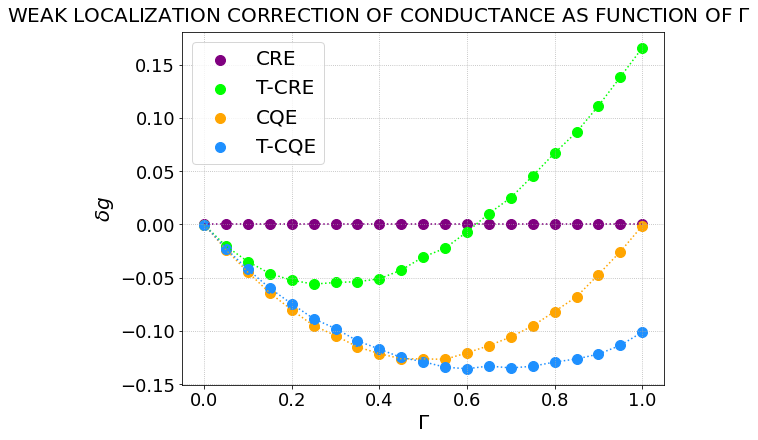

In [49]:
fig, axs = plt.subplots(1,1, figsize = (8,6), constrained_layout = True)

fig.suptitle(r'WEAK LOCALIZATION CORRECTION OF CONDUCTANCE AS FUNCTION OF $\Gamma$', fontsize = 20)

axs.plot([(i/20) for i in range(0,21)], (meanG_D_1 - meanG_D_1), color = 'purple', linestyle = ':', alpha = 1)
axs.plot([(i/20) for i in range(0,21)], (meanG_DIII_1 - meanG_D_1), color = 'lime', linestyle = ':', alpha = 1)
axs.plot([(i/20) for i in range(0,21)], (meanG_C_1 - meanG_D_1), color = 'orange', linestyle = ':', alpha = 1)
axs.plot([(i/20) for i in range(0,21)], (meanG_CI_1 - meanG_D_1), color = 'dodgerblue', linestyle = ':', alpha = 1)

axs.scatter([(i/20) for i in range(0,21)], (meanG_D_1 - meanG_D_1), label = 'CRE', s = 100, color = 'purple', alpha = 1)
axs.scatter([(i/20) for i in range(0,21)], (meanG_DIII_1 - meanG_D_1), label = 'T-CRE' , s = 100, color = 'lime', alpha = 1)
axs.scatter([(i/20) for i in range(0,21)], (meanG_C_1 - meanG_D_1), label = 'CQE', s = 100, color = 'orange', alpha = 1)
axs.scatter([(i/20) for i in range(0,21)], (meanG_CI_1 - meanG_D_1), label = 'T-CQE', s = 100, color = 'dodgerblue', alpha = 1)

axs.set_xlabel(r'$\Gamma$', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.set_ylabel(r'$\delta g$', fontsize = 20)
axs.grid(linestyle=':')
axs.legend(loc = "best", fontsize = 20)

In [47]:
meanP_U_1 = [2.65651015e-05, 1.03914344e-02, 2.08886384e-02, 3.19915957e-02,
 4.25901197e-02, 5.40545335e-02, 6.49673883e-02, 7.64627099e-02,
 8.67675477e-02, 9.77366198e-02, 1.08054567e-01, 1.18325281e-01,
 1.27155547e-01, 1.35281762e-01, 1.43201448e-01, 1.49564144e-01,
 1.55601046e-01, 1.60542745e-01, 1.64173388e-01, 1.66086992e-01,
 1.66494309e-01]

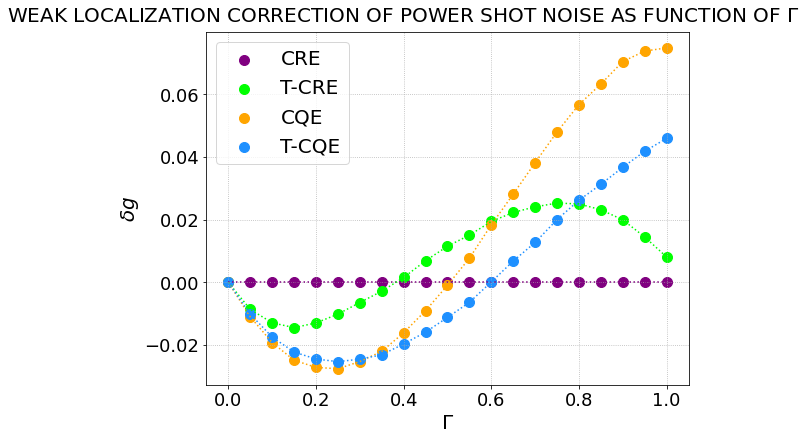

In [50]:
fig, axs = plt.subplots(1,1, figsize = (8,6), constrained_layout = True)

fig.suptitle(r'WEAK LOCALIZATION CORRECTION OF POWER SHOT NOISE AS FUNCTION OF $\Gamma$', fontsize = 20)

axs.plot([(i/20) for i in range(0,21)], (meanP_D_1 - meanP_D_1), color = 'purple', linestyle = ':', alpha = 1)
axs.plot([(i/20) for i in range(0,21)], (meanP_DIII_1 - meanP_D_1), color = 'lime', linestyle = ':', alpha = 1)
axs.plot([(i/20) for i in range(0,21)], (meanP_C_1 - meanP_D_1), color = 'orange', linestyle = ':', alpha = 1)
axs.plot([(i/20) for i in range(0,21)], (meanP_CI_1 - meanP_D_1), color = 'dodgerblue', linestyle = ':', alpha = 1)

axs.scatter([(i/20) for i in range(0,21)], (meanP_D_1 - meanP_D_1), label = 'CRE', s = 100, color = 'purple', alpha = 1)
axs.scatter([(i/20) for i in range(0,21)], (meanP_DIII_1 - meanP_D_1), label = 'T-CRE' , s = 100, color = 'lime', alpha = 1)
axs.scatter([(i/20) for i in range(0,21)], (meanP_C_1 - meanP_D_1), label = 'CQE', s = 100, color = 'orange', alpha = 1)
axs.scatter([(i/20) for i in range(0,21)], (meanP_CI_1 - meanP_D_1), label = 'T-CQE', s = 100, color = 'dodgerblue', alpha = 1)

axs.set_xlabel(r'$\Gamma$', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.set_ylabel(r'$\delta g$', fontsize = 20)
axs.grid(linestyle=':')
axs.legend(loc = "best", fontsize = 20)